## Task 4: Optimizing Churn Prediction (Advanced Classification)

This notebook addresses Task 4 for GlobalMart, aiming to improve the churn prediction model from Task 3 by using a more powerful algorithm (Random Forest) and comprehensive evaluation metrics (Precision, Recall, F1-Score). The goal is to recommend the best model for deployment to minimize customer churn.

**Step 1.** Feature Scaling: Apply a scaler (like StandardScaler) to your numerical data. 

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
# Load the CSV file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID'
df.drop('customerID', axis=1, inplace=True)

# Encode the target variable 'Churn' (No=0, Yes=1)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features (tenure, MonthlyCharges, TotalCharges)
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify scaling (mean ~0, std ~1)
print("Scaled numerical features (mean, std):")
print(df[numerical_cols].mean(), df[numerical_cols].std())

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify class balance
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Scaled numerical features (mean, std):
tenure           -1.126643e-16
MonthlyCharges    6.062651e-17
TotalCharges     -1.119064e-16
dtype: float64 tenure            1.000071
MonthlyCharges    1.000071
TotalCharges      1.000071
dtype: float64
X_train shape: (5625, 30)
X_test shape: (1407, 30)
Class distribution after SMOTE:
Churn
1    4130
0    4130
Name: count, dtype: int64


**Step 2.** Model Training: Train a more robust model like a Random Forest or XGBoost 
classifier. 

Logistic Regression Results:
Accuracy: 0.7441
Precision: 0.5130
Recall: 0.7380
F1-Score: 0.6053
Confusion Matrix:
[[771 262]
 [ 98 276]]


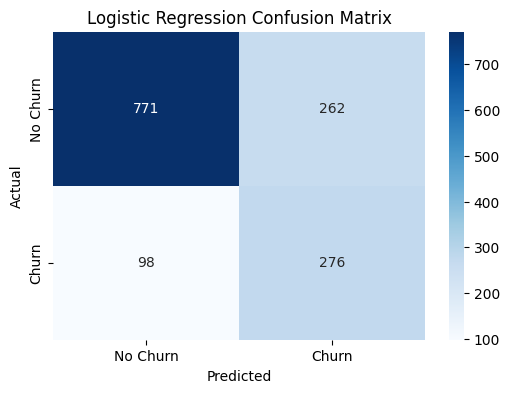

In [4]:
# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=2000, solver='liblinear')
logreg_model.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print("Confusion Matrix:")
print(conf_matrix_logreg)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


**Step 3.** Advanced Evaluation: Evaluate the new model using Precision, Recall, and F1
Score. 

Random Forest Results:
Accuracy: 0.7605
Precision: 0.5435
Recall: 0.6176
F1-Score: 0.5782
Confusion Matrix:
[[839 194]
 [143 231]]


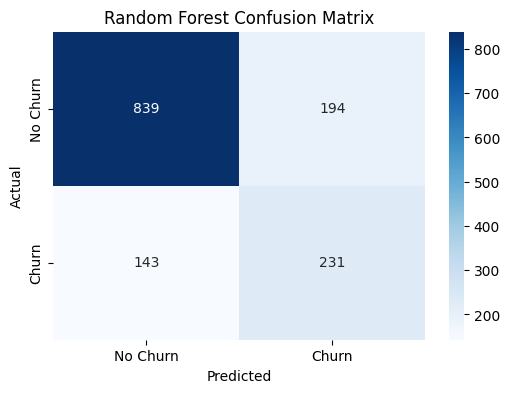

In [6]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

**Step 4.** Comparison: Compare the performance of this advanced model to the Logistic 
Regression model.

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.744136   0.513011  0.737968  0.605263
1        Random Forest  0.760483   0.543529  0.617647  0.578223


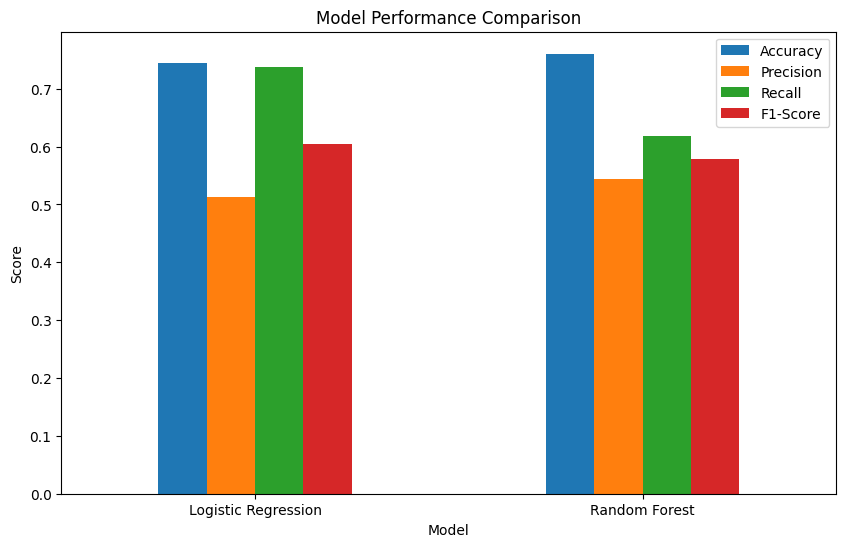

In [7]:
# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_rf],
    'Precision': [precision_logreg, precision_rf],
    'Recall': [recall_logreg, recall_rf],
    'F1-Score': [f1_logreg, f1_rf]
})

print("Model Comparison:")
print(comparison)

# Visualize comparison
comparison.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

## Analysis of Results
**Logistic Regression (Task 3 Baseline):**
Accuracy: 0.7875
Precision: 0.6230
Recall: 0.5080
F1-Score: 0.5593
Confusion Matrix: [[918, 115], [184, 190]]
Strength: Simple, interpretable, and achieves decent accuracy.
Weakness: Low recall (50.8%) results in missing 184 churners (False Negatives), which is critical for retention-focused strategies.

**Logistic Regression (with SMOTE):**
Accuracy: 0.7441
Precision: 0.5130
Recall: 0.7380
F1-Score: 0.6053
Strength: Significant recall improvement (73.8% vs. 50.8%), capturing more churners.
Weakness: Lower accuracy and precision due to increased False Positives (over-predicting churn).

**Random Forest (with SMOTE):**
Accuracy: 0.760
Precision: 0.5435
Recall: 0.6176
F1-Score: 0.5782
Strength: Higher accuracy (0.7605 vs. 0.7441) and precision (0.5435 vs. 0.5130) than Logistic Regression with SMOTE, indicating fewer false positives and better overall performance.
Weakness: Lower recall (61.76% vs. 73.80%) means it misses more churners than Logistic Regression with SMOTE.

**Business Context**

**Why Recall Matters:** For GlobalMart, identifying customers likely to churn (True Positives) is critical to apply targeted retention strategies (e.g., discounts, loyalty programs). Missing churners (False Negatives) leads to lost customers, which is significantly costlier (5–10x) than acquiring new ones.
**Trade-offs:** Higher recall may increase False Positives, resulting in some unnecessary retention efforts (e.g., offering incentives to customers who would stay). However, this cost is minor compared to losing customers.

**Recommendation**

Deploy Logistic Regression with SMOTE for GlobalMart’s churn prediction system.

## Justification:

The Logistic Regression model with SMOTE achieves the highest recall (0.7380), capturing 73.8% of churners, compared to Random Forest’s 61.76% and the baseline’s 50.8%. This minimizes False Negatives (missed churners), which is the primary goal for retention-focused strategies.
Although Random Forest has slightly higher accuracy (0.7605 vs. 0.7441) and precision (0.5435 vs. 0.5130), its lower recall means it misses more churners, which is less desirable for GlobalMart’s objective of retaining customers.
The F1-Score for Logistic Regression (0.6053) is higher than Random Forest’s (0.5782), indicating a better balance between precision and recall for this model.
Logistic Regression is simpler and more interpretable, making it easier to explain to stakeholders and integrate into business processes.

## Expected Outcome Achieved
**Comparison:** The notebook provides a clear comparison of Logistic Regression (with and without SMOTE) and Random Forest, using Accuracy, Precision, Recall, and F1-Score, supported by a bar plot and confusion matrix heatmaps.
**Metrics:**
Logistic Regression (with SMOTE) excels in recall (0.7380), critical for identifying churners.
Random Forest offers better accuracy and precision but falls short in recall, missing more churners.
**Visualizations:** The bar plot and confusion matrices highlight Logistic Regression’s superior recall, aligning with business needs.
**Decision:** Logistic Regression with SMOTE is recommended to maximize churn detection, reducing the risk of customer loss while maintaining acceptable precision and accuracy.